<a href="https://colab.research.google.com/github/Amasha03/Customer_Churn_Prediction/blob/main/notebooks/03_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
### CM2604 Machine Learning CourseWork
04-Neural Network

Student Name : Amasha Widanagamage  
RGU ID : 2425800  
IIT ID : 20241246



In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load dataset
df=pd.read_csv('/content/drive/MyDrive/ML/coursework/preprocessed_data.csv')

In [3]:
#Select important features
selected_features=[
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'PaperlessBilling',
    'Contract_Two year',
    'Contract_One year',
    'InternetService_Fiber optic',
    'OnlineBackup_Yes',
    'TechSupport_No',
    'PaymentMethod_Electronic check',
    'OnlineSecurity_Yes',
    'OnlineSecurity_No',
    'StreamingTV_No',
    'SeniorCitizen'

]

X=df[selected_features]
y=df['Churn']

In [4]:
#Train-Test Splits
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [5]:
#Hyperparameter Tuning
dtree=DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42)

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features': [None,'sqrt']
}

grid_search=GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train,y_train)

#Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [6]:
#Evaluate Model
best_dtree=grid_search.best_estimator_
y_pred=best_dtree.predict(X_test)

#Predicted probabilities for the positive class (Churn=1)
y_prob=best_dtree.predict_proba(X_test)[:,1]

#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

#AUC Score
auc=roc_auc_score(y_test,y_prob)
print(f"AUC Score: {auc*100:.2f}%")

print("\nClassification Report: \n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))


Accuracy: 71.78%
AUC Score: 64.29%

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1033
           1       0.47      0.48      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407


Confusion Matrix: 
 [[829 204]
 [193 181]]


In [7]:
best_params={
    'criterion':'gini',
    'max_depth':5,
    'max_features':'sqrt',
    'min_samples_leaf':1,
    'min_samples_split':2,
    'random_state':42
}
dtree_final=DecisionTreeClassifier(**best_params)

#Train on the training set
dtree_final.fit(X_train,y_train)

#Predict and evaluate
y_pred_final=dtree_final.predict(X_test)
y_prob_final=dtree_final.predict_proba(X_test)[:,1]

print("Accuracy:",accuracy_score(y_test,y_pred_final))
print("AUC Score:",roc_auc_score(y_test,y_prob_final))

print("\nClassification Report: \n",classification_report(y_test,y_pred_final))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred_final))

Accuracy: 0.7839374555792467
AUC Score: 0.8079732465018041

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix: 
 [[937  96]
 [208 166]]


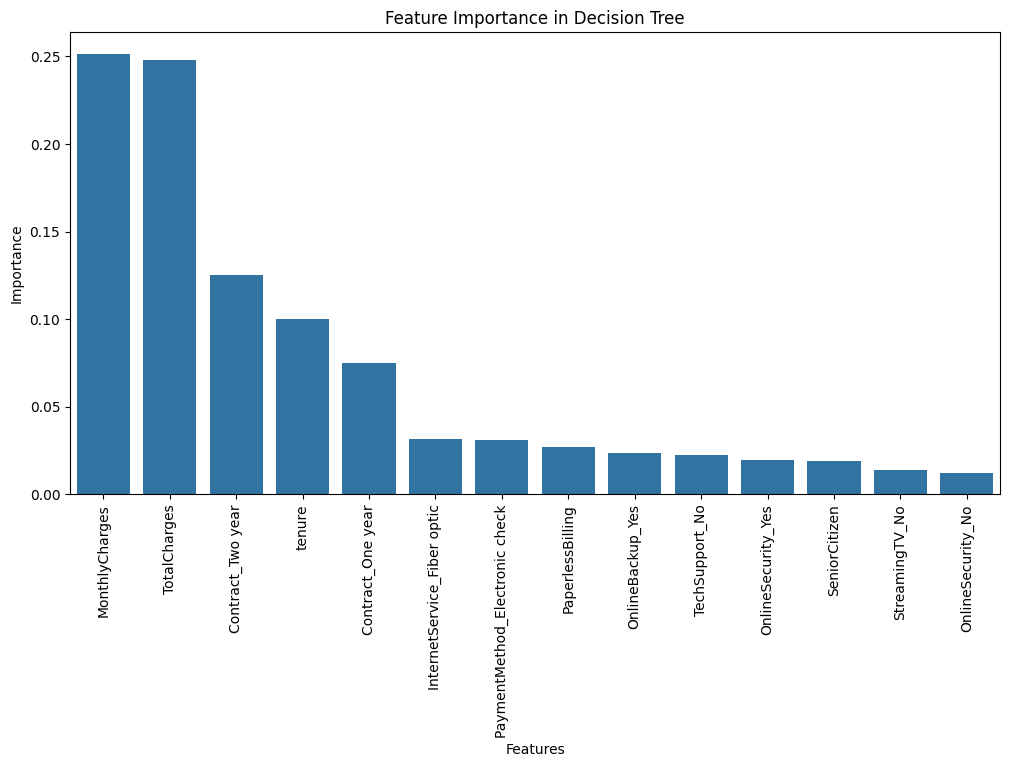

In [8]:
#Feature Importance Visualization
importances=best_dtree.feature_importances_
indices=np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=[selected_features[i] for i in indices],y=importances[indices])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=90)
plt.show()